<a href="https://colab.research.google.com/github/aditi30032002/aditi30032002/blob/main/housing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Housing Price Prediction using Linear Regression**

Use Linear Regression (Ordinary Least Square) to Predict House Price Problem

**Get Understanding about Data set**

There are 14 variables in dataset
 
 1.CRIM- per capita crime rate by town. 
 2.ZN- proportion of residential land zoned for lots over 25,000 sq.ft.
 3.INDUS- proportion of non-retail business acres per town.
 4.CHAS- Charles River dummy variable (1 if tract bounds river; 0 otherwise)
 5.NOX- nitric oxides concentration (parts  per 10 million)
 6.RM- average number of rooms per dwelling.
 7.AGE-proportion of owner-occupied units built prior to 1940
 8.DIS- weighted distances to five boston employement centres
 9.RAD- index of accessibility to radial highways
 10.TAX- full-value property-tax rat per $10,000
 11.PTRATIO- pupil-teacher ratio by town 
 12.B-1000(Bk-0.63)^2 where Bk is the proportion of blacks by town
 13.LSTAT-% lower status of the population
 14.MEDV- Median value of owner-occupied homes in $1000's







**Import Library**

In [4]:
import pandas as pd
import numpy as np

# **Import CSV as DataFrame**

Use URL of file directly


In [6]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Boston.csv')

### **or use local file path in Jupyter Notebook**

In [7]:
# df = pd.read_csv(r'C:\Users\YBI Foundation\Desktop\Boston.csv')

Or use file path after uploading file in Google Colab Notebbok

In [8]:
# df = pd.read_csv(r'/content/Boston.csv')

# **Get the First Five Rows of Dataframe**

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# **Get Information of DataFrame**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


# **Get the Summary Statistics**

In [12]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# **Get Column Names**

In [13]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

# **Get Shape of DataFrame**

In [14]:
df.shape

(506, 14)

### **Define y (dependent or label or trget variable ) and X (independent or features or attribute Variable)**

In [15]:
y = df['MEDV']

In [16]:
y.shape

(506,)

In [17]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [18]:
X = df[['CRIM', 'ZN' , 'INDUS' , 'CHAS' , 'NX' , 'RM' , 'AGE' , 'DIS' ,'RAD' , 'TAX' , 'PTRATIO' , 'B' , 'LSTAT']]

or use .drop function to define X

In [19]:
X = df.drop('MEDV' , axis=1)

In [20]:
X.shape

(506, 13)

In [21]:
X

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


## **Get X variables Standardized**

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn, they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

Next approach is go for MinMax Scaler.

In [22]:
from sklearn.preprocessing import MinMaxScaler


In [23]:
mn = MinMaxScaler()

In [24]:
X = mn.fit_transform(X)

In [25]:
X

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

# **Get train test split**

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=2529)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

# **Get Model Train**

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(X_train, y_train)

LinearRegression()

# **Get Model Prediction**

In [32]:
y_pred = lr.predict(X_test)

In [33]:
y_pred.shape

(152,)

In [34]:
y_pred

array([31.71733828, 22.02143302, 21.16613197, 39.77837246, 20.10258512,
       22.86056216, 18.35574643, 14.7902735 , 22.55778646, 21.34594953,
       18.38491085, 27.9664665 , 29.85929012,  6.44680773, 10.68297311,
       26.24809521, 21.89368671, 25.22692365,  3.62385942, 36.21920372,
       24.07812335, 22.94103934, 14.27095261, 20.79013279, 24.22725035,
       16.7379611 , 18.74856986, 20.96709658, 28.513571  , 20.86346628,
        9.23450577, 17.06754852, 22.06953886, 22.23121875, 39.25875323,
       26.16769924, 42.50354003, 19.34517962, 34.51869058, 14.07023676,
       13.81055358, 23.27727535, 11.79100403,  9.01040731, 21.64587594,
       25.55339317, 18.16941728, 16.81991401, 14.66170215, 14.86477172,
       33.78924259, 33.26959074, 15.49208778, 24.08269034, 27.63531226,
       19.58288727, 45.02488529, 20.96959671, 20.07202649, 27.67146866,
       34.59154418, 12.71353064, 23.66247812, 31.65792337, 28.97459925,
       32.45963484, 13.93494747, 35.491924  , 19.35871482, 19.60

# **Get Model Evaluation**

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [36]:
mean_squared_error(y_test,y_pred)

20.71801287783854

In [37]:
mean_absolute_error(y_test,y_pred)

3.1550309276024926

In [39]:
r2_score(y_test, y_pred)

0.6551914852365519

# **Get Visualization of Actual Vs Predicted Results**

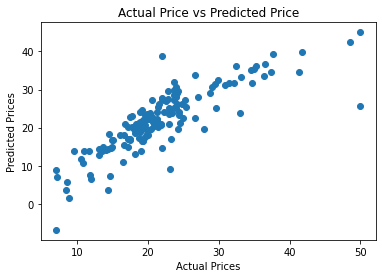

In [40]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

# **Get Future Predictions**

### **Lets Select a random sample from existing dataset as new value**

Steps to follow

   1.Extract a random row using sample function
   2.Separate X and y 
   3.Standardization
   4.Predict


In [42]:
X_new = df.sample(1)

In [43]:
X_new

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
115,0.17134,0.0,10.01,0,0.547,5.928,88.2,2.4631,6,432.0,17.8,344.91,15.76,18.3


In [44]:
X_new.shape

(1, 14)

In [45]:
X_new = X_new.drop('MEDV', axis = 1)

In [46]:
X_new

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
115,0.17134,0.0,10.01,0,0.547,5.928,88.2,2.4631,6,432.0,17.8,344.91,15.76


In [47]:
X_new.shape

(1, 13)

In [51]:
X_new = mn.fit_transform(X_new)

In [52]:
y_pred_new = lr.predict(X_new)

In [53]:
y_pred_new

array([25.6750862])